In [2]:
# imports modules required for reading & analyzing data
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [41]:
# assigns umbrella parameters to create larger, higher-quality plots
plt.rcParams['figure.figsize'] = 15,7.5
plt.rcParams['font.size'] = 20

In [18]:
# creates 'quick code' function to read the .csv file 
car_data = pd.read_csv('jeep_vs_subaru.csv', delimiter=',', nrows=30)

In [19]:
def drop_unnamed(dataframe):
    r"""
    Data pre-processing for my own dataset.
    """
    # go through all columns and drop if "unnamed" is part of label.
    for num in range(len(dataframe.columns)):
        try:
            dataframe = dataframe.drop(columns='Unnamed: %i'%(num))
        except:
            pass        
    return dataframe

In [5]:
car_data = drop_unnamed(car_data)
car_data.columns

Index(['state', 'carmax_location', 'zip_code', 'jeep_odometer_miles',
       'jeep_asking_price', 'subaru_odometer_miles', 'subaru_asking_price'],
      dtype='object')

In [6]:
# reads first five rows
car_data

,state,carmax_location,zip_code,jeep_odometer_miles,jeep_asking_price,subaru_odometer_miles,subaru_asking_price
0,oregon,beaverton,97008,113373,8999,111144,9900
1,maine,south_portland,4106,107775,6997,105189,9995
2,colorado,colorado_springs,80922,151195,7195,84990,11719
3,minnesota,maplewood,55109,117198,7999,97775,10979
4,north_carolina,gastonia,28054,101658,8135,99079,9780
5,ohio,dayton,45449,81057,8495,108126,13998
6,nevada,west_sahara,89146,98135,8995,140099,6995
7,new_york,albany,12205,106647,10995,95641,10995
8,washington,puyallup,98371,86345,8988,104023,9995
9,georgia,buford,30519,102879,6998,117871,7761


In [7]:
# reads only the columns defined within brackets
car_data[['state', 'jeep_odometer_miles', 'jeep_asking_price']]

,state,jeep_odometer_miles,jeep_asking_price
0,oregon,113373,8999
1,maine,107775,6997
2,colorado,151195,7195
3,minnesota,117198,7999
4,north_carolina,101658,8135
5,ohio,81057,8495
6,nevada,98135,8995
7,new_york,106647,10995
8,washington,86345,8988
9,georgia,102879,6998


In [8]:
# Prints series of objects instead of entire Data Frame
car_data.jeep_odometer_miles

0     113373
1     107775
2     151195
3     117198
4     101658
5      81057
6      98135
7     106647
8      86345
9     102879
10    114006
11     87606
12    114636
13    114221
14    113094
15    123001
16    100432
17    117194
18    113549
19     76785
20     87804
21     99462
22    123001
23    114221
24     92790
25     92438
26    119453
27     99690
28     83672
29     85492
Name: jeep_odometer_miles, dtype: int64

In [9]:
### Searches dataset for specific criteria within:
### 1) .column_name == (here: state)
### 2) 'search_criteria' (here: california)
car_data[car_data.state == 'california']

,state,carmax_location,zip_code,jeep_odometer_miles,jeep_asking_price,subaru_odometer_miles,subaru_asking_price
21,california,irvine,92618,99462,8995,95000,10500


# Preliminary Investigation into dataset

## Plot miles/price relationship

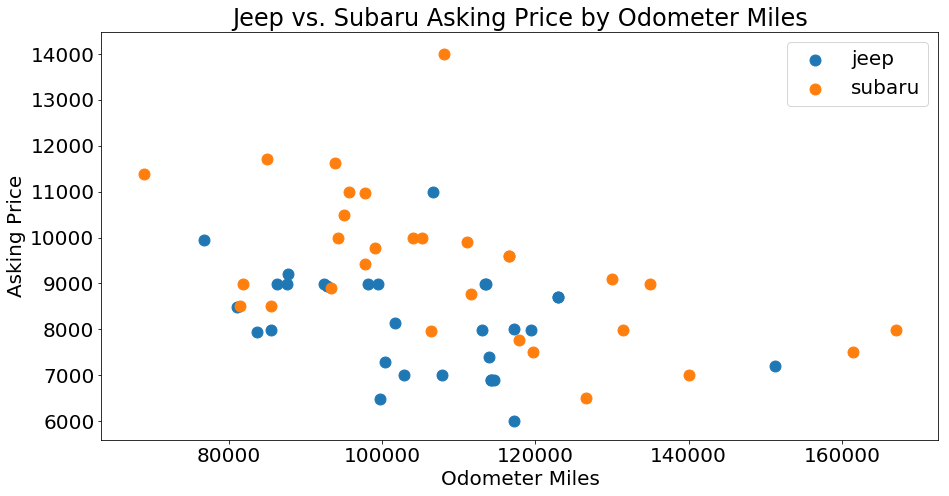

In [42]:
# assign variables according to columns in the car_data set
jeep_miles = car_data['jeep_odometer_miles']
jeep_price = car_data['jeep_asking_price']

subaru_miles = car_data['subaru_odometer_miles']
subaru_price = car_data['subaru_asking_price']

# plot a scatter plot
plt.scatter(jeep_miles, jeep_price, s=120, label='jeep')
plt.scatter(subaru_miles, subaru_price, s=120, label='subaru')
plt.legend()

plt.title('Jeep vs. Subaru Asking Price by Odometer Miles')
plt.xlabel('Odometer Miles')
plt.ylabel('Asking Price')

plt.show()

# Histograms 

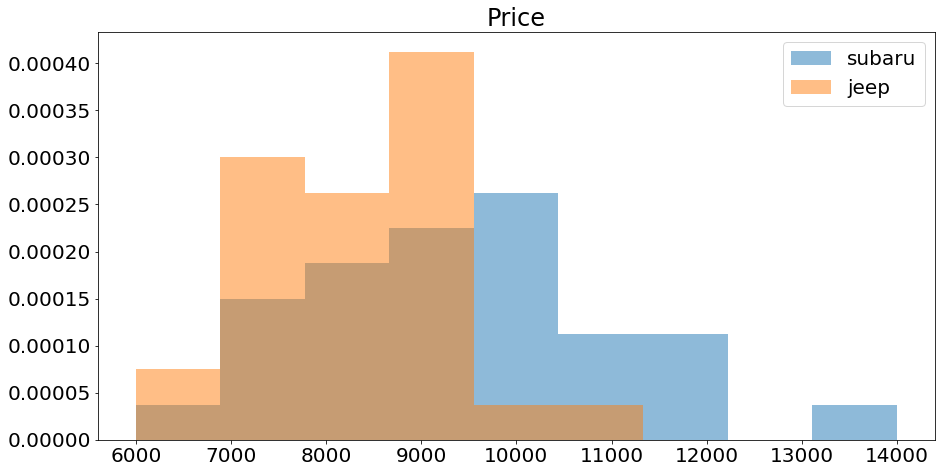

In [43]:
# create a histogram that groups ('bins') the Jeep vs. Subaru according to price
nbins = 10
prices = np.concatenate((subaru_price, jeep_price))
mn, mx = np.min(prices), np.max(prices)
my_bins = np.linspace(mn, mx, nbins)
plt.hist(subaru_price, bins=my_bins, alpha=0.5, label='subaru', density=True)
plt.hist(jeep_price, bins=my_bins, alpha=0.5, label='jeep', density=True)
plt.legend()
plt.title('Price')
plt.show()

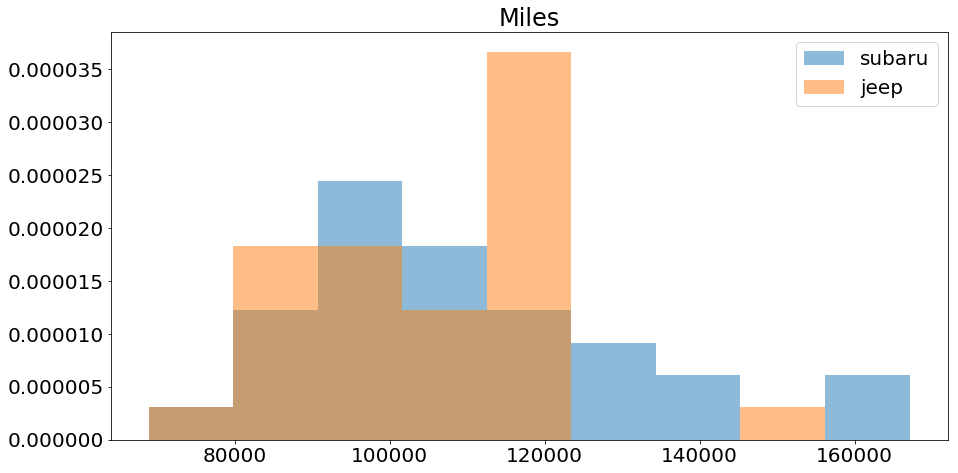

In [44]:
# create a histogram that groups ('bins') Jeep vs. Subaru according to miles
nbins = 10
miles = np.concatenate((subaru_miles, jeep_miles))
mn, mx = np.min(miles), np.max(miles)
my_bins = np.linspace(mn, mx, nbins)
plt.hist(subaru_miles, bins=my_bins, alpha=0.5, label='subaru', density=True)
plt.hist(jeep_miles, bins=my_bins, alpha=0.5, label='jeep', density=True)
plt.legend()
plt.title('Miles')
plt.show()

# Analysis

## Fit Distributions


In [14]:
import scipy.stats.distributions as dist

In [15]:
subaru_miles.to_numpy().reshape(-1,1).shape

(30, 1)

In [16]:
def vandermond_matrix(data):
    # if data is 1D, reshape it. 
    num_data_points = data.shape[0]
    A = np.column_stack( (np.ones(num_data_points), data))
    return A

In [17]:
subaru_miles = subaru_miles.to_numpy()

In [18]:
subaru_design_matrix = vandermond_matrix(subaru_miles)
jeep_design_matrix = vandermond_matrix(jeep_miles)

## Problem
$$
y = Ax
$$

where $A$ is the design matrix. $y$ is the thing you are trying to predict ("data") (price)

Regression: the "best" is given by the least squares solution. 

Numpy has an implementation already. `numpy.pinv`

In [19]:
subaru_price.to_numpy()
# subaru_design_matrix

array([ 9900,  9995, 11719, 10979,  9780, 13998,  6995, 10995,  9995,
        7761,  7500,  8777,  8999,  7498,  8500,  9588,  8500,  7988,
        6500,  9999,  9094, 10500,  9588,  7975,  9419,  8895, 11391,
        7995, 11624,  8999])

In [20]:
# the way we ordered this... first is intercept, second is slope. (y = b + mx)
def model_coeffs(design_matrix, signal):
    return np.linalg.pinv(design_matrix)@signal # 'pinv' is a pseudo inverse

subaru_coeffs = model_coeffs(subaru_design_matrix, subaru_price.to_numpy() )
jeep_coeffs = model_coeffs(jeep_design_matrix, jeep_price.to_numpy() )


In [21]:
# miles defined earlier.
plot_resolution = 1000
mn, mx = np.min(miles), np.max(miles)
miles_driven = np.linspace(mn, mx, plot_resolution)

In [22]:
print(subaru_coeffs, jeep_coeffs) 
# discover how to compare the slopes through a normal distriubution to determine if there is a stat. sig. dif between
# do not train regression models (lines) on 100% data, instead do on ~70% and then test regression using the remaining

[ 1.34946674e+04 -3.76421516e-02] [ 1.09388649e+04 -2.64714889e-02]


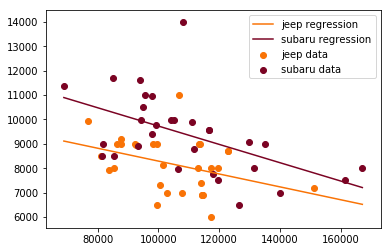

In [23]:
jeep_color, subaru_color = 'xkcd:orange', 'xkcd:wine red'

jeep_price_predicted = miles_driven*jeep_coeffs[1] + jeep_coeffs[0]
plt.plot(miles_driven, jeep_price_predicted, c=jeep_color, label='jeep regression')
plt.scatter(jeep_miles, jeep_price, c=jeep_color, label='jeep data')

subaru_price_predicted = miles_driven*subaru_coeffs[1] + subaru_coeffs[0]
plt.plot(miles_driven, subaru_price_predicted, c=subaru_color, label='subaru regression')
plt.scatter(subaru_miles, subaru_price, c=subaru_color, label='subaru data')
plt.legend()
plt.show()

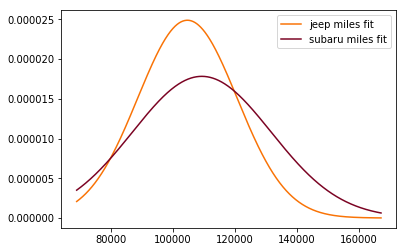

In [24]:
jeep_normal_dist_miles = dist.norm(loc=jeep_miles.mean(), scale=jeep_miles.std() )
subaru_normal_dist_miles = dist.norm(loc=subaru_miles.mean(), scale=subaru_miles.std() )

plt.plot(miles_driven, jeep_normal_dist_miles.pdf(miles_driven), label='jeep miles fit', c=jeep_color)
plt.plot(miles_driven, subaru_normal_dist_miles.pdf(miles_driven), label='subaru miles fit', c=subaru_color)
plt.legend()
plt.show()

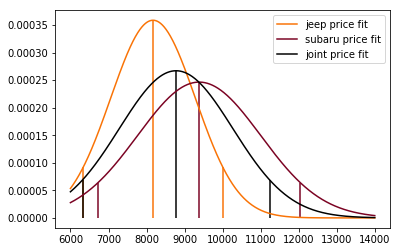

In [25]:
jeep_normal_dist_price = dist.norm(loc=jeep_price.mean(), scale=jeep_price.std() )
subaru_normal_dist_price = dist.norm(loc=subaru_price.mean(), scale=subaru_price.std() )
joint_normal_dist_price = dist.norm(loc=prices.mean(), scale=prices.std() )

plot_resolution = 1000
mn, mx = np.min(prices), np.max(prices)
dollars = np.linspace(mn, mx, plot_resolution)

alpha = 0.1
jeep_confidence_interval = jeep_normal_dist_price.interval(1-alpha)
subaru_confidence_interval = subaru_normal_dist_price.interval(1-alpha)
joint_confidence_interval = joint_normal_dist_price.interval(1-alpha)

jeep_price_pred = jeep_normal_dist_price.pdf(dollars)
subaru_price_pred = subaru_normal_dist_price.pdf(dollars)
joint_price_pred = joint_normal_dist_price.pdf(dollars)

plt.plot(dollars, jeep_price_pred, label='jeep price fit', c=jeep_color)
plt.plot(dollars, subaru_price_pred, label='subaru price fit', c=subaru_color)
plt.plot(dollars, joint_normal_dist_price.pdf(dollars), label='joint price fit', c='k')


for i in range(2):
    plt.vlines(jeep_confidence_interval[i], 0, jeep_normal_dist_price.pdf(jeep_confidence_interval[i]), color=jeep_color)
    plt.vlines(subaru_confidence_interval[i], 0, subaru_normal_dist_price.pdf(subaru_confidence_interval[i]),  color=subaru_color)
    plt.vlines(joint_confidence_interval[i], 0, joint_normal_dist_price.pdf(joint_confidence_interval[i]))

jeep_normal_dist_price_mean = jeep_normal_dist_price.mean()
subaru_normal_dist_price_mean = subaru_normal_dist_price.mean()
joint_normal_dist_price_mean = joint_normal_dist_price.mean()

plt.vlines(jeep_normal_dist_price_mean, 0, jeep_normal_dist_price.pdf(jeep_normal_dist_price_mean), color=jeep_color)
plt.vlines(subaru_normal_dist_price_mean, 0, subaru_normal_dist_price.pdf(subaru_normal_dist_price_mean),  color=subaru_color)
plt.vlines(joint_normal_dist_price_mean, 0, joint_normal_dist_price.pdf(joint_normal_dist_price_mean))
plt.legend()
plt.show()

- shapiro failed to reject possibility of normality. it's possible our samples came from normals.
- so let's fit normal distributions. 
- these can now be treated kind of like approximated "populations" to sample from.

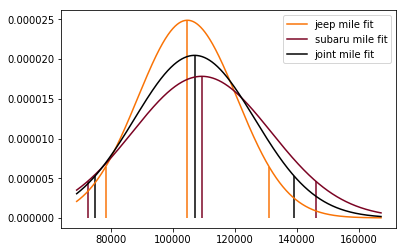

In [26]:
jeep_normal_dist_mile = dist.norm(loc=jeep_miles.mean(), scale=jeep_miles.std() )
subaru_normal_dist_mile = dist.norm(loc=subaru_miles.mean(), scale=subaru_miles.std() )
joint_normal_dist_mile = dist.norm(loc=miles.mean(), scale=miles.std() )

plot_resolution = 1000
mn, mx = np.min(miles), np.max(miles)
dollars = np.linspace(mn, mx, plot_resolution)

alpha = 0.1
jeep_confidence_interval = jeep_normal_dist_mile.interval(1-alpha)
subaru_confidence_interval = subaru_normal_dist_mile.interval(1-alpha)
joint_confidence_interval = joint_normal_dist_mile.interval(1-alpha)

jeep_mile_pred = jeep_normal_dist_mile.pdf(dollars)
subaru_mile_pred = subaru_normal_dist_mile.pdf(dollars)
joint_mile_pred = joint_normal_dist_mile.pdf(dollars)

plt.plot(dollars, jeep_mile_pred, label='jeep mile fit', c=jeep_color)
plt.plot(dollars, subaru_mile_pred, label='subaru mile fit', c=subaru_color)
plt.plot(dollars, joint_normal_dist_mile.pdf(dollars), label='joint mile fit', c='k')


for i in range(2):
    plt.vlines(jeep_confidence_interval[i], 0, jeep_normal_dist_mile.pdf(jeep_confidence_interval[i]), color=jeep_color)
    plt.vlines(subaru_confidence_interval[i], 0, subaru_normal_dist_mile.pdf(subaru_confidence_interval[i]),  color=subaru_color)
    plt.vlines(joint_confidence_interval[i], 0, joint_normal_dist_mile.pdf(joint_confidence_interval[i]))

jeep_normal_dist_mile_mean = jeep_normal_dist_mile.mean()
subaru_normal_dist_mile_mean = subaru_normal_dist_mile.mean()
joint_normal_dist_mile_mean = joint_normal_dist_mile.mean()

plt.vlines(jeep_normal_dist_mile_mean, 0, jeep_normal_dist_mile.pdf(jeep_normal_dist_mile_mean), color=jeep_color)
plt.vlines(subaru_normal_dist_mile_mean, 0, subaru_normal_dist_mile.pdf(subaru_normal_dist_mile_mean),  color=subaru_color)
plt.vlines(joint_normal_dist_mile_mean, 0, joint_normal_dist_mile.pdf(joint_normal_dist_mile_mean))
plt.legend()
plt.show()

B = dist.norm(*dist.norm.fit(subaru_miles))

In [27]:
plt.plot(miles_driven, B.pdf(miles_driven))
plt.ylim(0,0.00003)

NameError: name 'B' is not defined

In [ ]:
B.mean(), B.std()

In [28]:
jeep_miles.std()

16025.690597811428

In [49]:
joint_normal_dist_price = dist.norm(loc=prices.mean(), scale=prices.std() )
joint_normal_dist_price.interval(0.95)

(5847.42747167762, 11703.339194989047)

In [30]:
import scipy.stats


In [51]:
scipy.stats.ttest_ind(subaru_price, jeep_price, equal_var=False)

Ttest_indResult(statistic=3.3809600940166527, pvalue=0.001386882150564184)

now let's test our fitted distributions, generating larger sample sizes from them.
(artificial data set!!)

this is simulating new cars from each distribution

In [57]:
scipy.stats.ttest_ind(subaru_normal_dist_price.rvs(30), jeep_normal_dist_price.rvs(30), equal_var=False)

Ttest_indResult(statistic=2.0683221279596475, pvalue=0.04317595282188859)

In [33]:
a = np.random.randn(20)
b = np.random.randn(20) + 3
scipy.stats.ttest_ind(a, b)

Ttest_indResult(statistic=-9.231389395571869, pvalue=3.0032037741812606e-11)

In [58]:
scipy.stats.ttest_ind(subaru_miles, jeep_miles, equal_var=False)

Ttest_indResult(statistic=0.9136175845923031, pvalue=0.3651275291733391)

In [35]:
subaru_price.std(), jeep_price.std()

(1618.6807470651959, 1112.1946208792074)

In [36]:
scipy.stats.ttest_ind??

Signature: scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')
Source:   
def ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate'):
    """
    Calculate the T-test for the means of *two independent* samples of scores.

    This is a two-sided test for the null hypothesis that 2 independent samples
    have identical average (expected) values. This test assumes that the
    populations have identical variances by default.

    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape, except in the dimension
        corresponding to `axis` (the first, by default).
    axis : int or None, optional
        Axis along which to compute test. If None, compute over the whole
        arrays, `a`, and `b`.
    equal_var : bool, optional
        If True (default), perform a standard independent 2 sample test
        that assumes equal population variances [1]_.
        If False, perform Welch's t-test, which does not assume eq

In [45]:
scipy.stats.shapiro(subaru_price), scipy.stats.shapiro(jeep_price)

((0.9688223004341125, 0.5074750185012817),
 (0.9534995555877686, 0.2095884382724762))

p>0.05, so we fail to reject the null hypothesis.
The null hypothesis was that prices are normally distributed.


## Normal

In [46]:
scipy.stats.shapiro(subaru_miles), scipy.stats.shapiro(jeep_miles)
# fail to reject null hypothesis. it is possible that these are normally distributed

((0.9529148936271667, 0.20222873985767365),
 (0.9476072192192078, 0.1458173245191574))

## Not normal

In [39]:
scipy.stats.shapiro(np.random.rand(100)) # rejecting null hypothesis bc samples are uniform

(0.9465398788452148, 0.000494321109727025)

In [40]:
dist.t?

Signature:       dist.t(*args, **kwds)
Type:            t_gen
String form:     <scipy.stats._continuous_distns.t_gen object at 0x182135c198>
File:            ~/anaconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py
Docstring:      
A Student's t continuous random variable.

As an instance of the `rv_continuous` class, `t` object inherits from it
a collection of generic methods (see below for the full list),
and completes them with details specific for this particular distribution.

Methods
-------
rvs(df, loc=0, scale=1, size=1, random_state=None)
    Random variates.
pdf(x, df, loc=0, scale=1)
    Probability density function.
logpdf(x, df, loc=0, scale=1)
    Log of the probability density function.
cdf(x, df, loc=0, scale=1)
    Cumulative distribution function.
logcdf(x, df, loc=0, scale=1)
    Log of the cumulative distribution function.
sf(x, df, loc=0, scale=1)
    Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more accurate).
logsf(x, df

In [41]:
### this code esentially 'tilts' and 'shifts' the entire graph so that the regression line follows
### zero, and the error bars maintain their distance from the regression line/model
### the code also creates a set of all 'residuals,' or the distance of all the error bars.
jeep_predicted_value = ((jeep_coeffs[0]) + ((jeep_coeffs[1] * jeep_miles)))
jeep_true_value = jeep_price
jeep_price_residual = jeep_true_value - jeep_predicted_value

subaru_predicted_value = ((subaru_coeffs[0]) + ((subaru_coeffs[1] * subaru_miles)))
subaru_true_value = subaru_price
subaru_price_residual = subaru_true_value - subaru_predicted_value

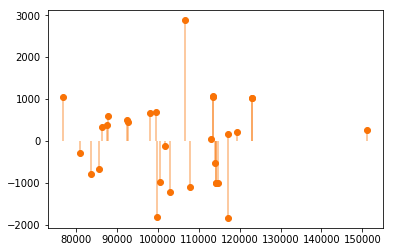

In [59]:
plt.scatter(jeep_miles, jeep_price_residual, c=jeep_color, label='jeep')
plt.vlines(jeep_miles, 0, jeep_price_residual, alpha = 0.5, color=jeep_color)

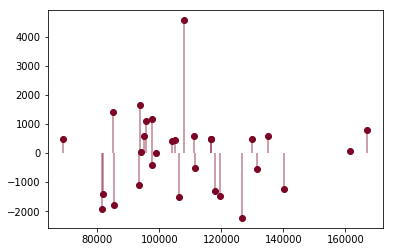

In [60]:
plt.scatter(subaru_miles, subaru_price_residual,c=subaru_color, label='subaru')
plt.vlines(subaru_miles, 0, subaru_price_residual, alpha = 0.5, color=subaru_color)

Text(0.5, 1.0, 'visual check for heteroscedasticity')

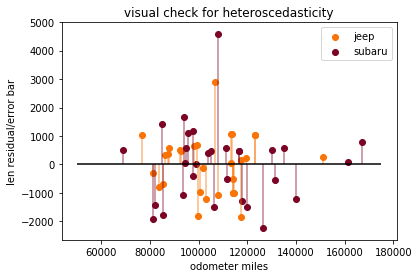

In [42]:
plt.hlines(0, 50000, 175000)
plt.legend()
plt.xlabel('odometer miles')
plt.ylabel('len residual/error bar')
plt.title('visual check for heteroscedasticity')

In [43]:
scipy.stats.shapiro(subaru_price_residual), scipy.stats.shapiro(jeep_price_residual)

((0.9085631966590881, 0.013691679574549198),
 (0.9505169987678528, 0.17453503608703613))

According to the Wilk Shapiro test, whose null hypothesis states that the data could be normal, subarus reject the null (implying possible heteroscedasticity), while jeeps fail to reject the null (implying less factor-dependent variation)

# Now, an attempt at exponential line fitting

In [44]:
def exponential_regression(x,p1,p2):
  return p1*np.log(x)+p2

popt, pcov = scipy.optimize.least_squares(exponential_regression, subaru_miles, subaru_price)

/Users/djdebonis/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [45]:
p1 = popt[0]
p2 = popt[1]


plt.scatter(subaru_miles, subaru_price)
curvex=np.linspace(70000,175000, 1000)
curvey=exponential_regression(curvex,p1,p2)
plt.plot(curvex,curvey,'r', linewidth=3)

NameError: name 'popt' is not defined

In [46]:
print(p1,p2)

NameError: name 'p1' is not defined

In [47]:

scipy.optimize?

Type:        module
String form: <module 'scipy.optimize' from '/Users/djdebonis/anaconda3/lib/python3.7/site-packages/scipy/optimize/__init__.py'>
File:        ~/anaconda3/lib/python3.7/site-packages/scipy/optimize/__init__.py
Docstring:  
Optimization and Root Finding (:mod:`scipy.optimize`)

.. currentmodule:: scipy.optimize

SciPy ``optimize`` provides functions for minimizing (or maximizing)
objective functions, possibly subject to constraints. It includes
solvers for nonlinear problems (with support for both local and global
optimization algorithms), linear programing,  constrained
and nonlinear least-squares, root finding and curve fitting.

Common functions and objects, shared across different solvers, are:

.. autosummary::
   :toctree: generated/

   show_options - Show specific options optimization solvers.
   OptimizeResult - The optimization result returned by some optimizers.
   OptimizeWarning - The optimization encountered problems.


Optimization

Scalar Functions Opti